In [1]:
from pycrown.pycrown2 import TreeFinder,CanopySegmentor
import matplotlib.pyplot as plt
# f = TreeFinder(1,min_height=15)
# b = CanopySegmentor()

In [2]:
import xarray
import numpy as np

In [3]:
chm = xarray.open_rasterio('example/data/CHM.tif')

/var/folders/0t/k17n0nrn7257_y9yn5m3ckym3_84ym/T/ipykernel_58610/1644990711.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  chm = xarray.open_rasterio('example/data/CHM.tif')


In [4]:
# f = TreeFinder(min_height=12, median_window_size=3, max_window_size=6)
# subset = np.tile(chm[0,...].values,(20,20))
subset = chm[0,...].values

In [5]:
# subset_filtered, tree_crowns = f.predict(subset)

In [6]:
# plt.imshow(subset_filtered)
# plt.scatter(tree_crowns[1, :], tree_crowns[0, :], c='r', s=1)

In [7]:
# %%timeit
# a.predict(subset, preds)
from colorcet import cm

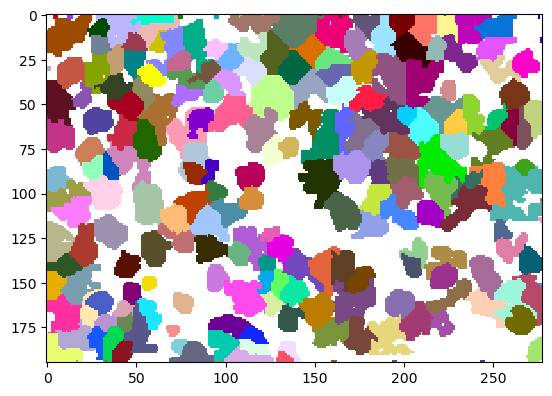

In [24]:
f = TreeFinder(min_height=15,
               median_window_size=3,
              max_window_size=5)

b = CanopySegmentor(
    algorithm='dalponte',
    th_tree=12,
    th_seed=.7,
    th_crown=.55,
    fill_limit=2,
    max_crown=15,
    post_process=True)

subset_filtered, tree_crowns = f.predict(subset)
seg = b.predict(subset_filtered, tree_crowns)
plt.imshow(seg, cmap=cm.glasbey, interpolation='None')

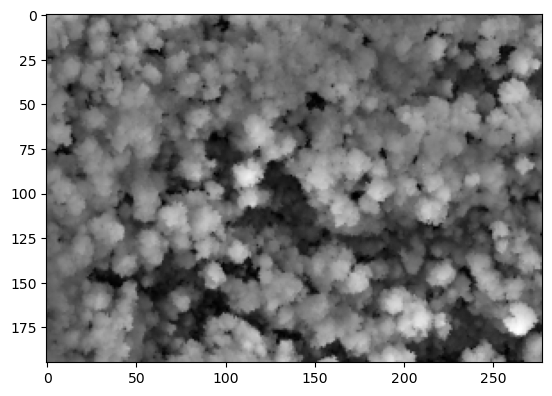

In [20]:
plt.imshow(subset_filtered,cmap='gray', alpha=1)

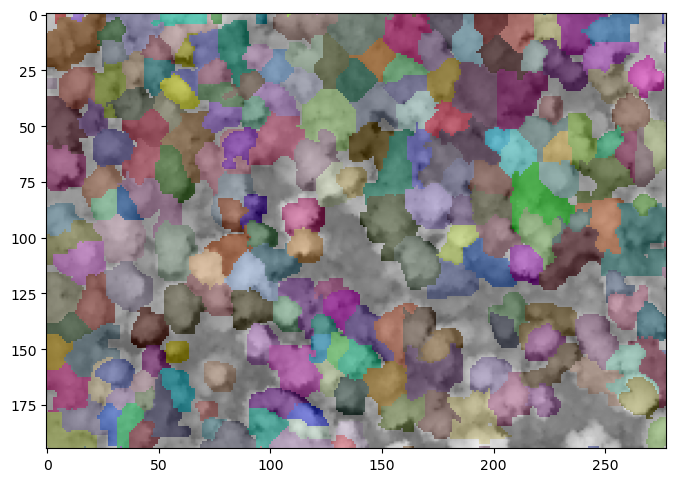

In [22]:
f,a = plt.subplots(figsize=(8,8))

plt.imshow(b.post_process(seg), cmap=cm.glasbey, interpolation='None', alpha=1)
plt.imshow(chm.values[0,...],cmap='gray', alpha=.6)

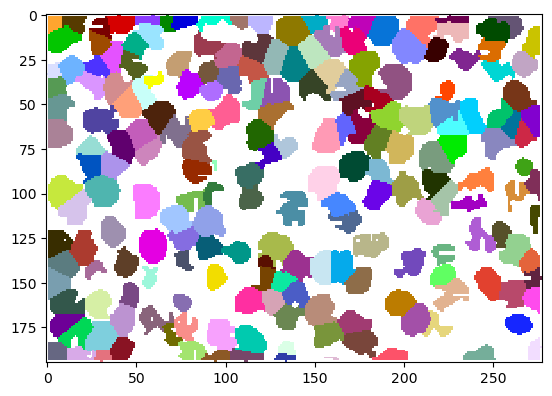

In [16]:
from sklearn

In [100]:
# predmask[predmask == 0] = np.nan

In [16]:
from skimage.morphology import area_closing, binary_closing

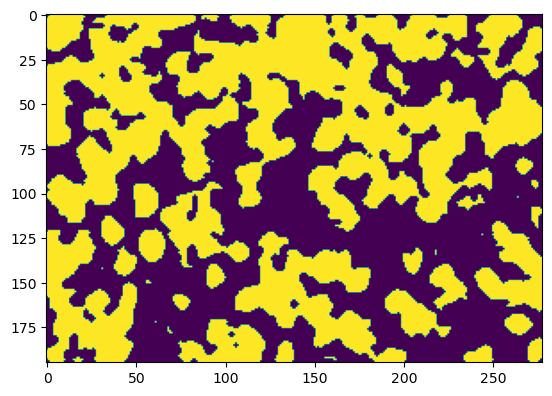

In [18]:
plt.imshow(binary_closing(seg))

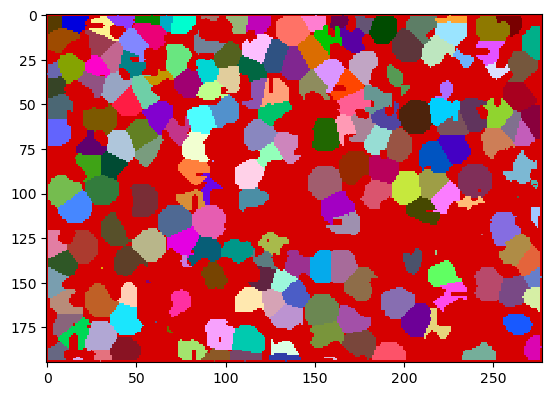

In [103]:
plt.imshow(predmask, cmap=cm.glasbey, interpolation='None')

In [111]:
from scipy.interpolate import interp2d

In [104]:
predmask[~binary_closing(predmask)] = -1

In [106]:
predmask[predmask==0] = np.nan

In [124]:
xarray.DataArray(xarray.DataArray(predmask)).dims[0]

'dim_0'

In [117]:
xarray.DataArray(predmask).interpolate_na(dim='dim_0', method='nearest').interpolate_na(dim='dim_0', method='nearest')

<xarray.DataArray (dim_0: 195, dim_1: 278)>
array([[ -1.,  -1.,  nan, ...,  -1.,  -1.,  -1.],
       [ -1.,   7.,   7., ...,  -1.,  -1.,  -1.],
       [ -1.,   7.,   7., ...,  -1.,  -1.,  -1.],
       ...,
       [ -1., 193., 193., ..., 190., 190.,  -1.],
       [ -1., 193., 193., ..., 190., 190.,  -1.],
       [ -1.,  -1.,  nan, ...,  nan,  -1.,  -1.]])
Dimensions without coordinates: dim_0, dim_1

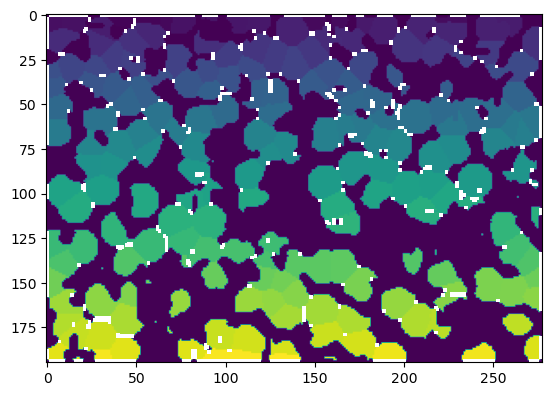

In [107]:
plt.imshow(predmask)

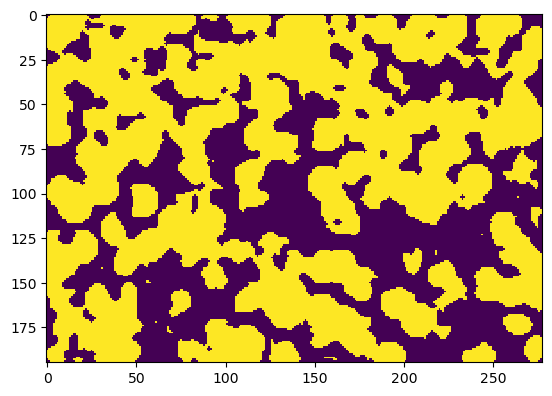

In [85]:
plt.imshow(, interpolation='None')

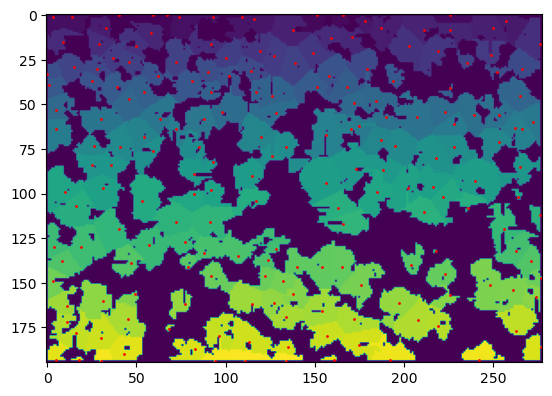

In [46]:
plt.imshow(b.predict(subset, preds))
plt.scatter(preds[1, :], preds[0, :], c='r', s=1)

In [13]:
%%timeit
b.predict(subset, preds)

5.06 s ± 93.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
c = CanopySegmentor('dalponteCIRC_numba')

In [15]:
%%timeit
c.predict(subset, preds)

792 ms ± 9.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
